# Weclcome to this tutorial!

#### Expecting that you have read the article, I'm going just to add some quotes so we can better understand the steps we're taking. Asume every quote here is from the article which link you can find here:

https://programminghistorian.org/en/lessons/visualizing-with-bokeh

"The dataset used in this tutorial is contained in **thor_wwii.csv**. This file is required to complete most of the examples below.

We’ll use Bokeh and Pandas to address some of the following questions:

* What types and weights of munitions were dropped during World War II (WWII)? What patterns can we discern in the use of different types of munitions?
* How did the types and weights of munitions dropped change over the course of WWII? How do these changes correspond to major military events?
* What targets were munitions dropped on during the war? Were particular types of munitions limited to certain theaters of operations or targets?" 

We're going to skip the step for virtual environment sinceI don't fint it very useful for this aprticular case of use. Instead of that, we'll start installing the needed packages.

# Installing Libraries

In [1]:
#-----------(Please uncomment to run)-------------
#You should instal Pandas if you haven't it already.
#!pip install pandas
#Instal pandas bokeh. We'll try to use the newest version even the tutorial suggest an specific version.
#!pip install pandas bokeh pyproj

# Your First Plot

First of all, we'll have to import the modules that we'll be using here:

In [2]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

We create some axis values that we'll intend to plot:

In [3]:
x = [1, 3, 5, 7]
y = [2, 4, 6, 8]

"Next we’ll create some data to plot. Data in Bokeh can take on different forms, but at its simplest, data is just a list of values. We create one list for our x-axis and one for our y-axis.

With our output format and data fixed, we can instantiate a figure and add the data to it."

In [4]:
p = figure()

p.circle(x, y, size=10, color='red', legend_label='circle')
p.line(x, y, color='blue', legend_label='line')
p.triangle(y, x, color='gold', size=10, legend_label='triangle')

#This legend policy will cause for items to disappear or 'hide' when clicked on, please feel free to try it.
p.legend.click_policy='hide'

print('Voilá! Our first figure. Now we need to plot it.')

Voilá! Our first figure. Now we need to plot it.


"After instantiating the figure, we call the circle , line, and triangle methods to plot our data. These types of methods are known as a glyph method. The term glyph in Bokeh refers to the lines, circles, bars, and other shapes that are added to plots to display data."

We'll use this method to display the results on the notebook:

In [5]:
output_notebook()

Loading BokehJS ...

In [6]:
show(p)

Now, if we wanted to keep our graph in HTML format we could also do this:

In [7]:
from bokeh.plotting import save
output_file("./MyGraphs/my_first_bokeh_graph.html", title="First graph made with Bokeh", mode='inline')
save(p)
print('Done!')

Done!


And to display it, we can call this packages:


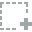
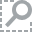
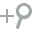
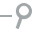
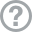
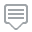
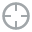
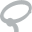
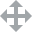
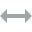
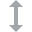
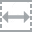
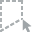
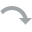
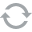
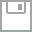
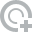
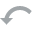
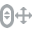
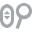
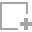
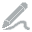
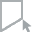
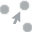
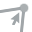

In [8]:
import IPython.display
from IPython.core.display import HTML
display(HTML("./MyGraphs/my_first_bokeh_graph.html"))
# Note: I tried to display it on the GitHub page but wasn't succesful. Any comments regarding this issue would eb welcomed.

# Bokeh and Pandas: Exploring the WWII THOR Dataset

Once again, I'll asume you have read the tutorial and will go on with the Pandas' exploration of the dataset.

In [9]:
#Import pandas...
import pandas as pd

Now we need to read the CSV file from the url, for that we do:

In [10]:
url = 'https://raw.githubusercontent.com/programminghistorian/ph-submissions/gh-pages/assets/visualizing-with-bokeh/thor_wwii.csv'
df = pd.read_csv(url)
df.head()

MSNDATE THEATER COUNTRY_FLYING_MISSION  NAF   UNIT_ID AIRCRAFT_NAME  \
0  03/30/1941     ETO          GREAT BRITAIN  RAF   84 SQDN      BLENHEIM   
1  11/24/1940     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   
2  12/04/1940     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   
3  12/31/1940     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   
4  01/06/1941     ETO          GREAT BRITAIN  RAF  211 SQDN      BLENHEIM   

   AC_ATTACKING TAKEOFF_BASE TAKEOFF_COUNTRY  TAKEOFF_LATITUDE  \
0          10.0          NaN             NaN               NaN   
1           9.0          NaN             NaN               NaN   
2           9.0          NaN             NaN               NaN   
3           9.0          NaN             NaN               NaN   
4           9.0          NaN             NaN               NaN   

   TAKEOFF_LONGITUDE TGT_COUNTRY TGT_LOCATION  TGT_LATITUDE  TGT_LONGITUDE  \
0                NaN     ALBANIA      ELBASAN         41.10          20.07   
1                NaN     ALBANIA      DURAZZO         41.32          19.45   
2                NaN     ALBANIA     TEPELENE         40.30          20.02   
3                NaN     ALBANIA       VALONA         40.47          19.49   
4                NaN     ALBANIA       VALONA         40.47          19.49   

   TONS_HE  TONS_IC  TONS_FRAG  TOTAL_TONS  
0      0.0      0.0        0.0         0.0  
1      0.0      0.0        0.0         0.0  
2      0.0      0.0        0.0         0.0  
3      0.0      0.0        0.0         0.0  
4      0.0      0.0        0.0         0.0

In [11]:
df.shape

(178281, 19)

In [12]:
df.dtypes

MSNDATE                    object
THEATER                    object
COUNTRY_FLYING_MISSION     object
NAF                        object
UNIT_ID                    object
AIRCRAFT_NAME              object
AC_ATTACKING              float64
TAKEOFF_BASE               object
TAKEOFF_COUNTRY            object
TAKEOFF_LATITUDE          float64
TAKEOFF_LONGITUDE         float64
TGT_COUNTRY                object
TGT_LOCATION               object
TGT_LATITUDE              float64
TGT_LONGITUDE             float64
TONS_HE                   float64
TONS_IC                   float64
TONS_FRAG                 float64
TOTAL_TONS                float64
dtype: object

## We now have an idea of what the dataset looks like:
- It has 19 columns and over 170.000 rows.
- The names of the columns.
- Some rows contain objects (more likely strings and dates), another one floats and some NaN objects (null values for floats as it is Numpy's representation).

# The Bokeh ColumnDataSource

We import the next packages we'll need to use for this step:

In [13]:
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

We declare the location of the desired output file:

In [14]:
output_file('./MyGraphs/columndatasource_example.html', title="Columndatasource Example", mode='inline')

Now we create a sample of 50 rows at random from our Panda's DataFrame and stablish the source variable as our sample:

In [15]:
sample = df.sample(50)
source = ColumnDataSource(sample)

Now we start creating another **p1** figure:

In [16]:
p1 = figure()

And now we'll define: 
- Which columns from the source dataset will be used as axis
- The title of our graph
- The axis' labels
- Which information will be displayed as we hover our mouse over the points in the graph


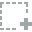
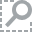
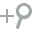
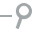
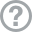
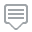
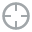
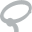
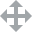
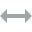
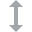
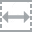
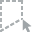
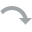
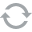
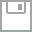
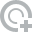
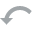
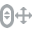
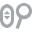
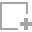
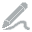
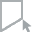
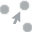
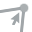

In [17]:
p1.circle(x='TOTAL_TONS', y='AC_ATTACKING',
         source=source,
         size=10, color='green')

p1.title.text = 'Attacking Aircraft and Munitions Dropped'
p1.xaxis.axis_label = 'Tons of Munitions Dropped'
p1.yaxis.axis_label = 'Number of Attacking Aircraft'

hover = HoverTool()
hover.tooltips=[
    ('Attack Date', '@MSNDATE'),
    ('Attacking Aircraft', '@AC_ATTACKING'),
    ('Tons of Munitions', '@TOTAL_TONS'),
    ('Type of Aircraft', '@AIRCRAFT_NAME')
]

p1.add_tools(hover)

save(p1)
display(HTML("./MyGraphs/columndatasource_example.html"))

# Categorical Data and Bar Charts: Munitions Dropped by Country

"In the preceding example, we plotted quantitative data. Frequently, though, we want to plot categorical data. Categorical data, in contrast to quantitative, is data that can be divided into groups, but that does not necessarily have a numerical aspect to it. For example, while your height is numerical, your hair color is categorical. From the perspective of our dataset, features like attacking country hold categorical data, while features like the weight of munitions hold quantitative data.

In this section, we’ll learn how to use categorical data as our x-axis values in Bokeh and how to use the vbar glyph method to create a vertical bar chart (an hbar glyph method functions similarly to create a horizontal bar chart). In addition, we’ll learn about preparing categorical data in Pandas by grouping data. Further, we’ll add to our knowledge of Bokeh styling and the hover tool."

#### We now call some new packages and redefine our output again:

In [18]:
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
output_file('./MyGraphs/munitions_by_country.html', title="Munitions By Country", mode='inline')

Now we group up the data ina a big sum in order to shape the data as we need:

In [19]:
grouped = df.groupby('COUNTRY_FLYING_MISSION')['TOTAL_TONS', 'TONS_HE', 'TONS_IC', 'TONS_FRAG'].sum()
grouped

TOTAL_TONS     TONS_HE     TONS_IC  TONS_FRAG
COUNTRY_FLYING_MISSION                                               
AUSTRALIA                   479.89      453.90      13.600      18.64
GREAT BRITAIN           1112598.95   868277.23  209036.158    1208.00
NEW ZEALAND                2629.06     4263.70     166.500       0.00
SOUTH AFRICA                 11.69       15.00       0.000       0.00
USA                     1625487.68  1297955.65  205288.200  127655.98

"To plot this data, let’s convert to kilotons by dividing by 1000. [...] This is a convenience that we’ll continue to use in future examples."

In [20]:
grouped = grouped / 1000
grouped

TOTAL_TONS     TONS_HE     TONS_IC  TONS_FRAG
COUNTRY_FLYING_MISSION                                               
AUSTRALIA                  0.47989     0.45390    0.013600    0.01864
GREAT BRITAIN           1112.59895   868.27723  209.036158    1.20800
NEW ZEALAND                2.62906     4.26370    0.166500    0.00000
SOUTH AFRICA               0.01169     0.01500    0.000000    0.00000
USA                     1625.48768  1297.95565  205.288200  127.65598

Now for the graph:

In [22]:
source2 = ColumnDataSource(grouped)
countries = source2.data['COUNTRY_FLYING_MISSION'].tolist()
p2 = figure(x_range=countries)

"Now, we need to make a ColumnDataSource from our grouped data and create a figure. Since our x-axis will list the five countries (rather than numerical data) we need to tell the figure how to handle the x-axis.

To do this, we create a list of countries from our source object, using source.data and the column name as key. The list of countries is then passed as the x_range to our figure constructor. Because this is a list of text data, the figure knows the x-axis is categorical and it also knows what possible values our x range can take (i.e. AUSTRALIA, GREAT BRITAIN, etc.)."


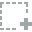
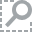
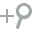
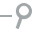
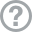
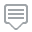
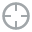
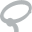
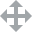
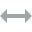
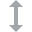
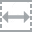
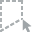
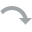
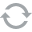
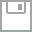
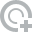
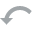
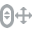
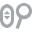
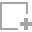
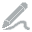
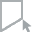
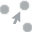
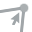

In [23]:
color_map = factor_cmap(field_name='COUNTRY_FLYING_MISSION',
                    palette=Spectral5, factors=countries)

p2.vbar(x='COUNTRY_FLYING_MISSION', top='TOTAL_TONS', source=source2, width=0.70, color=color_map)

p2.title.text ='Munitions Dropped by Allied Country'
p2.xaxis.axis_label = 'Country'
p2.yaxis.axis_label = 'Kilotons of Munitions'

hover = HoverTool()
hover.tooltips = [
    ("Totals", "@TONS_HE High Explosive / @TONS_IC Incendiary / @TONS_FRAG Fragmentation")]

hover.mode = 'vline'

p2.add_tools(hover)

save(p2)
display(HTML("./MyGraphs/munitions_by_country.html"))

# Stacked Bar Charts and Sub-sampling Data: Types of Munitions Dropped by Country

As usual, we'll be creating a new outpu formatt for this graph: 

In [24]:
output_file('./MyGraphs/types_of_munitions.html', title="Types of munitions dropped by Country", mode='inline')

We now prepare the data:

In [25]:
filter = df['COUNTRY_FLYING_MISSION'].isin(('USA','GREAT BRITAIN'))
usagb_df = df[filter]
usagb_df.shape

(125526, 19)

What we have just donde is filtering the original dataframe into a new one that contains only data where de ctountry flying mission is USA or Great Britain. That's why we have the same amount of columns but far less rows.

Now, we want to group up our information:

In [26]:
usagb_grouped = usagb_df.groupby('COUNTRY_FLYING_MISSION')['TONS_IC', 'TONS_FRAG', 'TONS_HE'].sum()
usagb_grouped = usagb_grouped/1000
usagb_grouped

TONS_IC  TONS_FRAG     TONS_HE
COUNTRY_FLYING_MISSION                                   
GREAT BRITAIN           209.036158    1.20800   868.27723
USA                     205.288200  127.65598  1297.95565

Now we set up a new figure and start seting our parameters:

In [27]:
source3 = ColumnDataSource(usagb_grouped)
countries = source3.data['COUNTRY_FLYING_MISSION'].tolist()
p3 = figure(x_range=countries)


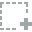
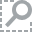
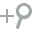
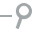
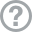
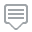
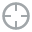
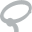
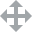
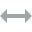
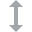
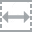
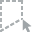
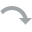
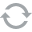
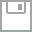
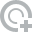
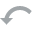
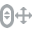
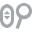
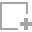
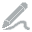
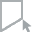
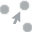
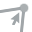

In [28]:
#this time we import a new spectral package
from bokeh.palettes import Spectral3

p3.vbar_stack(stackers=['TONS_HE', 'TONS_FRAG', 'TONS_IC'],
             x='COUNTRY_FLYING_MISSION', source=source3,
             legend_label = ['High Explosive', 'Fragmentation', 'Incendiary'],
             width=0.5, color=Spectral3)

p3.title.text ='Types of Munitions Dropped by Allied Country'
p3.legend.location = 'top_left'

p3.xaxis.axis_label = 'Country'
p3.xgrid.grid_line_color = None	#remove the x grid lines

p3.yaxis.axis_label = 'Kilotons of Munitions'

save(p3)
display(HTML("./MyGraphs/types_of_munitions.html"))

# Time-Series and Annotations: Bombing Operations over Time

New saving destination:

In [29]:
output_file('./MyGraphs/simple_timeseries_plot.html', title="Simple timeseries plot", mode='inline')

As this is going to be a time's series and we could see at the exploratory phase that the column MSNDATE is in an object format, we'll have to transform it (note that we're changing it within the original DataFrame):

In [30]:
df['MSNDATE'] = pd.to_datetime(df['MSNDATE'], format='%m/%d/%Y')
df.dtypes

MSNDATE                   datetime64[ns]
THEATER                           object
COUNTRY_FLYING_MISSION            object
NAF                               object
UNIT_ID                           object
AIRCRAFT_NAME                     object
AC_ATTACKING                     float64
TAKEOFF_BASE                      object
TAKEOFF_COUNTRY                   object
TAKEOFF_LATITUDE                 float64
TAKEOFF_LONGITUDE                float64
TGT_COUNTRY                       object
TGT_LOCATION                      object
TGT_LATITUDE                     float64
TGT_LONGITUDE                    float64
TONS_HE                          float64
TONS_IC                          float64
TONS_FRAG                        float64
TOTAL_TONS                       float64
dtype: object

We can see that the type has succesfully been transformed. It's time to group the data up.

In [31]:
series_grouped = df.groupby('MSNDATE')['TOTAL_TONS', 'TONS_IC', 'TONS_FRAG'].sum()
series_grouped = series_grouped/1000

series_grouped

TOTAL_TONS  TONS_IC  TONS_FRAG
MSNDATE                                   
1939-09-03       0.000    0.000      0.000
1939-09-04       0.000    0.000      0.000
1939-09-05       0.000    0.000      0.000
1939-09-07       0.000    0.000      0.000
1939-09-08       0.000    0.000      0.000
...                ...      ...        ...
1945-12-27       0.037    0.002      0.011
1945-12-28       0.065    0.002      0.000
1945-12-29       0.019    0.000      0.000
1945-12-30       0.048    0.000      0.000
1945-12-31       0.050    0.000      0.000

[1899 rows x 3 columns]

In [32]:
source4 = ColumnDataSource(series_grouped)
p4 = figure(x_axis_type='datetime')


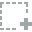
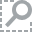
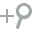
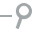
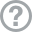
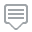
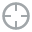
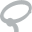
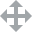
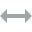
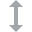
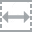
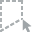
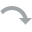
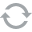
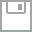
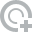
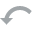
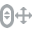
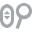
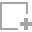
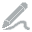
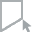
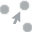
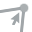

In [33]:
p4.line(x='MSNDATE', y='TOTAL_TONS', line_width=2, source=source4, legend_label='All Munitions')
p4.line(x='MSNDATE', y='TONS_FRAG', line_width=2, source=source4, color=Spectral3[1], legend_label='Fragmentation')
p4.line(x='MSNDATE', y='TONS_IC', line_width=2, source=source4, color=Spectral3[2], legend_label='Incendiary')

p4.yaxis.axis_label = 'Kilotons of Munitions Dropped'

save(p4)
display(HTML("./MyGraphs/simple_timeseries_plot.html"))